In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
# JSON is preferred over PICKLE due to security reasons

In [3]:
with open('accounts.txt', mode='w')   as accounts:
    accounts.write('100 Jones   24.98\n')
    accounts.write('200 Doe   345.67\n')
    accounts.write('300 White   0.00\n')
    accounts.write('400 Stone   -42.16\n')
    accounts.write('500 Rich   224.62\n')

In [4]:
# At the end of the 'with' statement’s suite, the with statement implicitly calls the file object’s close method
# to close the file.

In [5]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
          account, name, balance = record.split()
          print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


In [6]:
# file_object.seek(0)
# this re-positions the pointer to the beginning of the file. This is preferred method of doing this.
# another way to do this is to close and re-open the file

In [9]:
# use a with statement to update the accounts.txt file to change account 300’s name from 'White' to 'Williams'

accounts = open('accounts.txt',   'r')

temp_file = open('temp_file.txt',   'w')

with accounts,   temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account,   'Williams', balance])
            temp_file.write(new_record + '\n')

In [10]:
# removing the 'accounts.txt' file and renaming the 'temp' file

import os

os.remove('accounts.txt')

os.rename('temp_file.txt', 'accounts.txt')

#### JSON

In [11]:
# The json module enables you to convert objects to JSON (JavaScript Object Notation) text format
# This is known as serializing the data. 

In [12]:
accounts_dict = {'accounts':   [
                                {'account': 100, 'name': 'Jones', 'balance': 24.98},
                                {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [13]:
type(accounts_dict)

dict

In [14]:
accounts_dict

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [15]:
import json

In [16]:
with open("accounts.json", mode='w') as accounts:
    json.dump(accounts_dict, accounts)

####### The json module’s load function reads the entire JSON contents of its file object argument and converts the JSON into a Python object. This is known as deserializing the data. 

In [17]:
with open("accounts.json", 'r') as accounts:
    accounts_json = json.load(accounts)
    
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [19]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [20]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

#### Exceptions

When an exception occurs in a try suite, it terminates immediately. If there are any except handlers following the try suite, program control transfers to the first one. If there are no except handlers, a process called stack unwinding occurs.

When an except clause successfully handles the exception, program execution resumes with the finally clause (if there is one), then with the next statement after the try statement.

The finally clause is guaranteed to execute. The only reason a finally suite will not execute if program control enters the corresponding try suite is if the application terminates first, for example by calling the sys modules exit function.

In [21]:
try:
    print("Try executing this")
except:
    print("This does not execute as there are no exceptions raised")
else:
    print("This executes as no exceptions raised")
finally:
    print("This executes at all times")

Try executing this
This executes as no exceptions raised
This executes at all times


The raise statement explicitly raises an exception. The simplest form of the raise statement is

raise ExceptionClassName

Raising an exception in a finally suite can lead to subtle, hard-to-find problems. For this reason, a finally suite should always enclose in a try statement any code that may raise an exception, so that the exceptions will be processed within that suite.

#### Titanic dataset

In [22]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/' + 'Rdatasets/csv/carData/TitanicSurvival.csv')

In [23]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [24]:
titanic.columns = ['name',   'survived', 'sex', 'age', 'class']

In [25]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [27]:
titanic['survived'].describe()

# this describes non-numeric column
# unique means how many unique values it has: yes / no in this case
# top means which occurs maximum times: yes or no
# freq indicates the frequency of the top value i.e. no in this case

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F52F870>]],
      dtype=object)

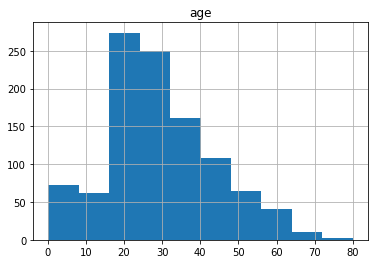

In [30]:
titanic.hist()